In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#global variables 

FMT = '%Y-%m-%d  %H:%M:%S'
data2 = pd.read_csv("taxi _zone_lookup.csv")
b = ['Manhattan', 'Queens', 'EWR', 'Bronx', 'Staten Island', 'Brooklyn', 'Unknown']
p1 = {}
p2 = {}
p3 = {}
p4 = {}

In [3]:
#initializing variables with JANUARY, whole NY


# retieving data to be cleaned
raw_data  = pd.read_csv("yellow_tripdata_2018-01.csv")

# cleaning data
raw_data['delta'] = (pd.to_datetime(raw_data['tpep_dropoff_datetime']) -  pd.to_datetime(raw_data['tpep_pickup_datetime'])).astype('timedelta64[m]')
data = raw_data.drop(raw_data[(raw_data.delta > 200) | (raw_data.trip_distance <= 0) | (raw_data.trip_distance > 200) | (raw_data.tpep_dropoff_datetime == raw_data.tpep_pickup_datetime) | (raw_data.total_amount < 0) | (pd.DatetimeIndex(raw_data['tpep_pickup_datetime']).month != 1) | (pd.DatetimeIndex(raw_data['tpep_pickup_datetime']).year != 2018)].index) 

# free memory deleting the raw_data
del raw_data

# taking only the columns that I need
data = data.loc[:, ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID']]
    
pickup_time = pd.to_datetime(data['tpep_pickup_datetime'].str.strip(), format = FMT)
dropoff_time = pd.to_datetime(data['tpep_dropoff_datetime'].str.strip(), format = FMT)
delta = (dropoff_time - pickup_time).astype('timedelta64[m]')

del pickup_time
del dropoff_time

In [4]:
#initializing variables with JANUARY, each Borough

borough = data.join(data2.set_index('LocationID'), on='PULocationID')

del data

for i in b:
    bor = borough[borough.Borough == i]
    pickup_time = pd.to_datetime(bor['tpep_pickup_datetime'].str.strip(), format = FMT)
    dropoff_time = pd.to_datetime(bor['tpep_dropoff_datetime'].str.strip(), format = FMT)
    delta_b = (dropoff_time - pickup_time).astype('timedelta64[m]')
    
    agg = pd.DataFrame(delta_b.value_counts(), columns = ['y'])
    agg = agg[agg.index >= 0]
    
    less_ten = agg[agg.index <= 10].sort_index()
    try:
        pr1 = (less_ten.cumsum() / delta.size).tail(1).y.item()
    except:
        pr1 = 0
    p1[i] = pr1 
    less_twenty = agg[agg.index <= 20]
    less_twenty = less_twenty[less_twenty.index > 10].sort_index()
    try:
        pr2 = (less_twenty.cumsum() / delta.size).tail(1).y.item()
    except:
        pr2 = 0
    p2[i] = pr2 
    more = agg[agg.index > 20]
    more = more[more.index <= 30].sort_index()
    try :
        pr3 = (more.cumsum() / delta.size).tail(1).y.item()
    except:
        pr3 = 0
    p3[i] = pr3 
    more_hour = agg[agg.index > 30].sort_index()
    try :
        pr4 = (more_hour.cumsum() / delta.size).tail(1).y.item()
    except:
        pr4 = 0
    p4[i] = pr4


Manhattan
Queens
EWR
Bronx
Staten Island
Brooklyn
Unknown


In [5]:
#retriving data in each month of 2018

for i in range(2,7):
        print(i)
        # retieving data to be cleaned
        raw_data  = pd.read_csv("yellow_tripdata_2018-0"+str(i)+".csv")

        # cleaning data
        raw_data['delta'] = (pd.to_datetime(raw_data['tpep_dropoff_datetime']) -  pd.to_datetime(raw_data['tpep_pickup_datetime'])).astype('timedelta64[m]')
        data = raw_data.drop(raw_data[(raw_data.delta > 200) | (raw_data.trip_distance <= 0) | (raw_data.trip_distance > 200) | (raw_data.tpep_dropoff_datetime == raw_data.tpep_pickup_datetime) | (raw_data.total_amount < 0) | (pd.DatetimeIndex(raw_data['tpep_pickup_datetime']).month != i) | (pd.DatetimeIndex(raw_data['tpep_pickup_datetime']).year != 2018)].index) 

        # free memory deleting the raw_data
        del raw_data

        # taking only the columns that I need
        data = data.loc[:, ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID']]
    
        pickup_time = pd.to_datetime(data['tpep_pickup_datetime'].str.strip(), format = FMT)
        dropoff_time = pd.to_datetime(data['tpep_dropoff_datetime'].str.strip(), format = FMT)
        delta = delta.append((dropoff_time - pickup_time).astype('timedelta64[m]'))
        del pickup_time
        del dropoff_time
        agg = pd.DataFrame(delta.value_counts(), columns = ['number_of_rides'])
        agg = agg[agg.index >= 0]
                
        borough = data.join(data2.set_index('LocationID'), on='PULocationID')
        del data
        
        #looking for timeslots data in each borough        
        for i in b:
            bor = borough[borough.Borough == i]
            pickup_time = pd.to_datetime(bor['tpep_pickup_datetime'].str.strip(), format = FMT)
            dropoff_time = pd.to_datetime(bor['tpep_dropoff_datetime'].str.strip(), format = FMT)
            delta_b = (dropoff_time - pickup_time).astype('timedelta64[m]')
    
            agg = pd.DataFrame(delta_b.value_counts(), columns = ['y'])
            agg = agg[agg.index >= 0]
    
            less_ten = agg[agg.index <= 10].sort_index()
            try:
                pr1 = (less_ten.cumsum() / delta_b.size).tail(1).y.item()
            except:
                pr1 = 0
            p1[i] = (p1[i] + pr1) /2
            less_twenty = agg[agg.index <= 20]
            less_twenty = less_twenty[less_twenty.index > 10].sort_index()
            try:
                pr2 = (less_twenty.cumsum() / delta_b.size).tail(1).y.item()
            except:
                pr2 = 0
            p2[i] = (p2[i] + pr2) /2
            more = agg[agg.index > 20]
            more = more[more.index <= 40].sort_index()
            try :
                pr3 = (more.cumsum() / delta_b.size).tail(1).y.item()
            except:
                pr3 = 0
            p3[i] = (p3[i] + pr3) /2
            more_hour = agg[agg.index > 40].sort_index()
            try :
                pr4 = (more_hour.cumsum() / delta_b.size).tail(1).y.item()
            except:
                pr4 = 0
            p4[i] = (p4[i] + pr4) /2


2
Manhattan
Queens
EWR
Bronx
Staten Island
Brooklyn
Unknown
3
Manhattan
Queens
EWR
Bronx
Staten Island
Brooklyn
Unknown
4
Manhattan
Queens
EWR
Bronx
Staten Island
Brooklyn
Unknown
5
Manhattan
Queens
EWR
Bronx
Staten Island
Brooklyn
Unknown
6
Manhattan
Queens
EWR
Bronx
Staten Island
Brooklyn
Unknown


In [6]:
del data2

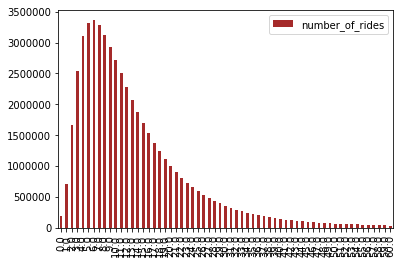

In [31]:
#creating the dataframe. Each column of the plot represents a 1-minute timeslot (ascending order)
agg = pd.DataFrame(delta.value_counts(), columns = ['number_of_rides'])
agg = agg[agg.index >= 0]

distro = agg[agg.index <= 60]
distro = distro.sort_index()
distro.plot.bar(color = 'brown')


0.5028193466887009

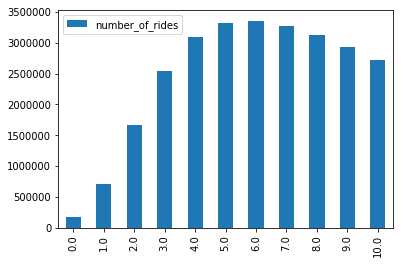

In [8]:
#rides that least less than 10 minutes
less_ten = agg[agg.index <= 10]
less_ten = less_ten.sort_index()
percent1 = (less_ten.cumsum() / delta.size).tail(1).number_of_rides.item()
#rides that least less than 10 minutes
percent1

0.31105443543748745

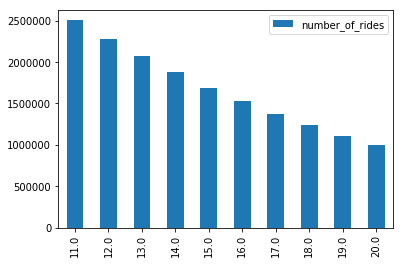

In [9]:
#rides that least more than 10 minutes and less 20 minutes

less_twenty = agg[agg.index <= 20]
less_twenty = less_twenty[less_twenty.index > 10]
less_twenty = less_twenty.sort_index()
percent2 = (less_twenty.cumsum() / delta.size).tail(1).number_of_rides.item()
percent2

0.14992264153987592

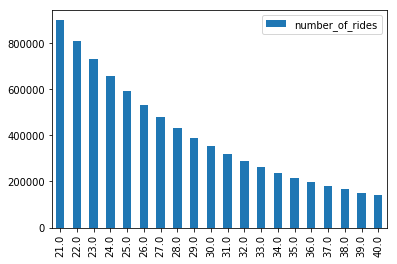

In [10]:
#rides that least more than 20 minutes and less than 40 minutes

more = agg[agg.index > 20]
more = more[more.index <= 40]

more.plot.bar()

more = more.sort_index()
percent3 = (more.cumsum() / delta.size).tail(1).number_of_rides.item()
percent3

In [11]:
#rides that least more 40 minutes

more_hour = agg[agg.index > 40] 
more_hour = more_hour.sort_index()
percent4 = (more_hour.cumsum() / delta.size).tail(1).number_of_rides.item()
percent4

0.03620324020390096

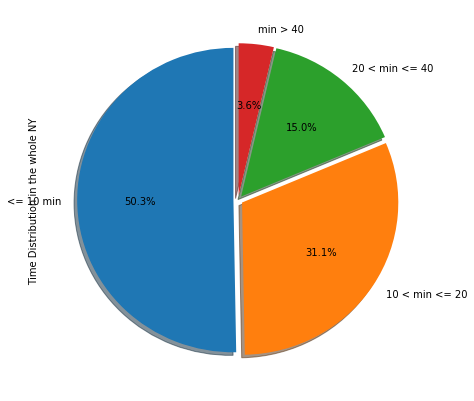

In [12]:
d = {'Time Distribution in the whole NY': [percent1, percent2, percent3, percent4]}
df = pd.DataFrame(data=d, index=['<= 10 min', '10 < min <= 20', '20 < min <= 40', 'min > 40'])
plt.figure(figsize=(7,7))
explode = (0.03, 0.03, 0.03, 0.03) 
#ax1 = plt.subplot(121, aspect='equal')
df['Time Distribution in the whole NY'].plot.pie(autopct='%1.1f%%', explode = explode, startangle=90, shadow=True, legend = False, fontsize=10)

In [13]:
my1 = pd.DataFrame.from_dict(p1, orient='index', dtype=None, columns=['<= 10 min'])
my2 = pd.DataFrame.from_dict(p2, orient='index', dtype=None, columns=['10 < min <= 20'])
my3 = pd.DataFrame.from_dict(p3, orient='index', dtype=None, columns=['20 < min <= 40'])
my4 = pd.DataFrame.from_dict(p4, orient='index', dtype=None, columns=['min > 40'])

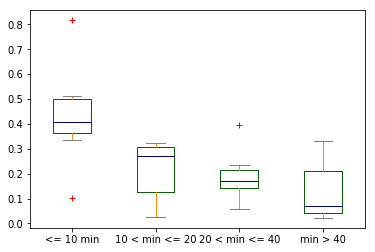

In [14]:
result = pd.concat([my1, my2, my3], axis=1)
my4 = my4.reset_index(drop=True)
result = result.reset_index(drop=True)
result = result.join(my4)
result = result.rename(index={0: 'Manhattan', 1: 'Queens', 2: 'EWR', 3:'Bronx', 4: 'Staten Island', 5:'Brooklyn', 6:'Unknown'})

color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
result.plot.box(color = color, sym='r+')


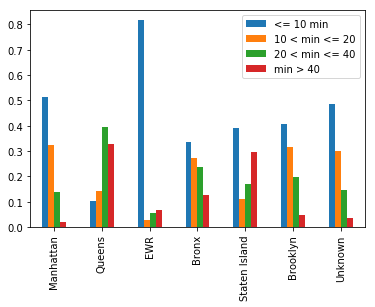

In [15]:
result.plot.bar()

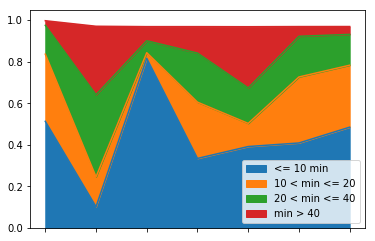

In [16]:
result.plot.area()
